In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/Elon_musk.csv",encoding='cp1252')
df.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 I’m an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [3]:
df.drop(columns="Unnamed: 0",inplace=True)

In [4]:
df.head()

Text
0                             @kunalb11 I’m an alien
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                @joerogan @Spotify Great interview!
3                    @gtera27 Doge is underestimated
4  @teslacn Congratulations Tesla China for amazi...

In [5]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [6]:
df['Text'] = df.Text.apply(clean)
df.Text

0                                             im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [7]:
#Word frequency
freq = pd.Series(' '.join(df['Text']).split()).value_counts()
freq

the         487
to          400
a           356
is          355
of          315
           ... 
nyquil        1
musk          1
negati        1
carousel      1
altho         1
Length: 4605, dtype: int64

In [8]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')
from nltk import tokenize

#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
df

Text
0                                              im alien
1     idaacarmack ray tracing cyberpunk hdr nextleve...
2                      joerogan spotify great interview
3                                   doge underestimated
4     teslacn congratulations tesla china amazing ex...
...                                                 ...
1994  flcnhvy true sounds surreal negative propagand...
1995  ppathole make sure read ur terms amp condition...
1996                  teslagong ppathole samwise gamgee
1997                         ppathole altho dumb dumber
1998                             progress update august

[1999 rows x 1 columns]

In [10]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['Text']).split()).value_counts()
freq_Sw

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
                 ... 
nyquil              1
musk                1
negati              1
carousel            1
altho               1
Length: 4482, dtype: int64

In [11]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
word_freq_df

term  occurrences  frequency
0                aber            1   0.000076
1                able            6   0.000453
2                 abo            1   0.000076
3              aboard            1   0.000076
4               abort            3   0.000227
...               ...          ...        ...
4458  zshauladventure            1   0.000076
4459       zubinanary            1   0.000076
4460      zwiebelbach            1   0.000076
4461           zzcool            1   0.000076
4462         ðogecoin            1   0.000076

[4463 rows x 3 columns]

In [13]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns = names_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
df2

able  abort  absolutely  access  ...  yourfavgas  yup  zero  zone
0      0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0
1      0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0
2      0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0
3      0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0
4      0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0
...    ...    ...         ...     ...  ...         ...  ...   ...   ...
1994   0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0
1995   0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0
1996   0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0
1997   0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0
1998   0.0    0.0         0.0     0.0  ...         0.0  0.0   0.0   0.0

[1999 rows x 1000 columns]

In [15]:
#tri-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [31]:
top2_words = get_top_n2_words(df["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["tri-gram", "Freq"]
top2_df.head()

tri-gram  Freq
0              rt spacex falcon    17
1            falcon first stage     9
2           spacex falcon first     8
3  thesheetztweetz waemd spacex     8
4             course still love     7

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

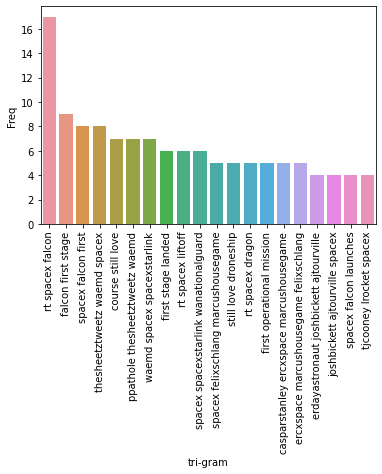

In [40]:
sns.barplot(x=top2_df["tri-gram"][:20],y=top2_df["Freq"][:20])
plt.xticks(rotation=90)

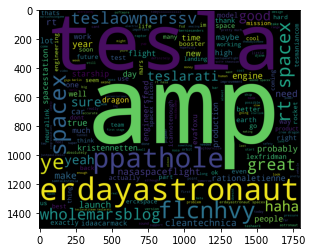

In [17]:
string_Total = " ".join(df["Text"])
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# ***Tesla word is most used buy elon***

In [18]:
!pip install afinn
from afinn import Afinn
afinn=Afinn(language='en')#setting language to english

In [19]:

df["afinn_score"]= df["Text"].apply(afinn.score)#to calculate the sentiment total score of each documents in text.
df

Text  afinn_score
0                                              im alien          0.0
1     idaacarmack ray tracing cyberpunk hdr nextleve...          0.0
2                      joerogan spotify great interview          3.0
3                                   doge underestimated         -1.0
4     teslacn congratulations tesla china amazing ex...          6.0
...                                                 ...          ...
1994  flcnhvy true sounds surreal negative propagand...         -1.0
1995  ppathole make sure read ur terms amp condition...          1.0
1996                  teslagong ppathole samwise gamgee          0.0
1997                         ppathole altho dumb dumber         -3.0
1998                             progress update august          2.0

[1999 rows x 2 columns]

In [20]:
#for word counting to further generalize afinn_score
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [21]:
df['word_count'] = df['Text'].apply(word_count)
df

Text  ...  word_count
0                                              im alien  ...           2
1     idaacarmack ray tracing cyberpunk hdr nextleve...  ...           7
2                      joerogan spotify great interview  ...           4
3                                   doge underestimated  ...           2
4     teslacn congratulations tesla china amazing ex...  ...          10
...                                                 ...  ...         ...
1994  flcnhvy true sounds surreal negative propagand...  ...          11
1995  ppathole make sure read ur terms amp condition...  ...          10
1996                  teslagong ppathole samwise gamgee  ...           4
1997                         ppathole altho dumb dumber  ...           4
1998                             progress update august  ...           3

[1999 rows x 3 columns]

In [23]:
df['afinn_adjusted_score'] = df['afinn_score'] / df['word_count'] * 100
df

Text  ...  afinn_adjusted_score
0                                              im alien  ...              0.000000
1     idaacarmack ray tracing cyberpunk hdr nextleve...  ...              0.000000
2                      joerogan spotify great interview  ...             75.000000
3                                   doge underestimated  ...            -50.000000
4     teslacn congratulations tesla china amazing ex...  ...             60.000000
...                                                 ...  ...                   ...
1994  flcnhvy true sounds surreal negative propagand...  ...             -9.090909
1995  ppathole make sure read ur terms amp condition...  ...             10.000000
1996                  teslagong ppathole samwise gamgee  ...              0.000000
1997                         ppathole altho dumb dumber  ...            -75.000000
1998                             progress update august  ...             66.666667

[1999 rows x 4 columns]

In [41]:
df.describe()

afinn_score   word_count  afinn_adjusted_score
count  1999.000000  1999.000000           1974.000000
mean      0.812906     6.653827             15.285004
std       1.874707     4.030691             37.256796
min      -7.000000     0.000000           -300.000000
25%       0.000000     3.000000              0.000000
50%       0.000000     6.000000              0.000000
75%       2.000000    10.000000             27.272727
max      12.000000    20.000000            200.000000

In [25]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


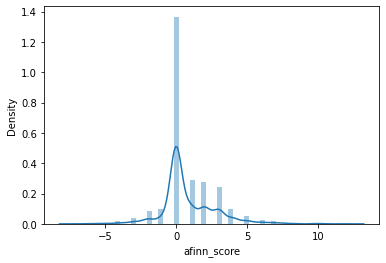

In [26]:
sns.distplot(df["afinn_score"])

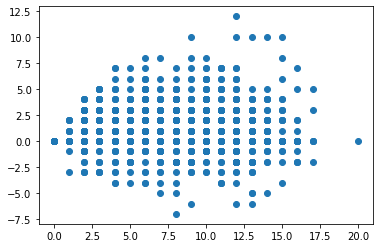

In [27]:

plt.scatter(y='afinn_score', x='word_count',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


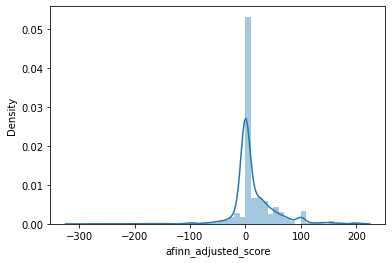

In [30]:

sns.distplot(df["afinn_adjusted_score"])    

#As we can see plot is positively skewed we can say that sentimental of most tweet are +ve (good) in nature